In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import imageio
import numpy as np
import flowermodel.find_blobs as fb
from tqdm import tqdm
import ipywidgets as widgets
from flowermodel import plotting  
import pandas as pd
import glob


# The following files were downloaded:

# 41586_2019_1429_MOESM2_ESM.mov hFweX(GFP/RFP) 0-24.024hr
# 41586_2019_1429_MOESM3_ESM.mov hFwe1(GFP)-hFwe1(RFP) 0-23.707hr
# 41586_2019_1429_MOESM4_ESM.mov hFwe1(GFP)-hFwe2(RFP) 0-23.707hr
# 41586_2019_1429_MOESM5_ESM.mov hFwe1(GFP)-hFwe2(RFP) :10-26:18hr
# 41586_2019_1429_MOESM8_ESM.mov Z-VAD-FMK:hFwe1(GFP)-hFwe2(RFP) 0-24.09hr 
# 41586_2019_1429_MOESM9_ESM.mov hFweX(GFP)-hFweKO(RFP) 0-24.009?hr

In [24]:
!flowermodel framecount --filename /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM3_ESM.mov

378


In [35]:
%%bash
idx=3
flowermodel pbs --filename /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM${idx}_ESM.mov --jobname blob${idx}

qsub blob${idx}.pbs

10545333[].helix-master


In [2]:
# import pandas as pd
# import glob
# moviefile = '41586_2019_1429_MOESM3_ESM.mov'
# files = glob.glob('../data/blobs/{:s}/blob*.csv'.format(moviefile))
# blobs = [pd.read_csv(file) for file in files]
# blobs = pd.concat(blobs).sort_values(['frame', 'color', 'x', 'y']).reset_index(drop=True)

# blobs.to_csv('../data/blobs/{:s}.blob.csv'.format(moviefile), index=False)

In [6]:
moviefile = '41586_2019_1429_MOESM3_ESM.mov'
blobs = pd.read_csv('../data/blobs/{:s}.blob.csv'.format(moviefile))

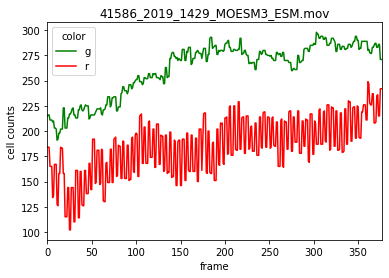

In [7]:
blobcounts = blobs.groupby(['frame', 'color']).size().unstack()
blobcounts.plot(color=blobcounts.columns.tolist())
plt.ylabel('cell counts');
plt.title(moviefile);

In [8]:
filename = '../data/movies/{:s}'.format(moviefile)
vid = imageio.get_reader(filename,  'ffmpeg')

def f(img_idx):
    plotting.plot_blob_overlay(vid, img_idx, blobs);

interactive_plot = widgets.interactive(f, img_idx=widgets.IntSlider(
    min=0, max=vid.count_frames()-1, continuous_update=False))

output = interactive_plot.children[-1]
output.layout.height = '550px'
output.layout.width = '550px'
interactive_plot

interactive(children=(IntSlider(value=0, continuous_update=False, description='img_idx', max=377), Output(layo…

In [10]:
for img_idx in range(3):
    plotting.plot_blob_overlay(vid, img_idx, blobs)
    plt.close()

In [15]:
import flowermodel.calculate_rdf as crdf 
data_path = '/projects/chuang-lab/jnh/flower/data'
rdfobj = crdf.vidrdf(data_path, moviefile)

for color1 in ['r', 'g']:
    for color2 in ['r', 'g']:
        rdfdf = rdfobj.get_rdf(color1, color2)

 46%|████▋     | 175/378 [00:46<01:00,  3.37it/s]/projects/chuang-lab/jnh/flower/flowermodel/flowermodel/calculate_rdf.py:103: RuntimeWarning: invalid value encountered in long_scalars
  rdf = ((r1 <= self.dist) & (self.dist < r2)).sum()/ self.N/ a
100%|██████████| 378/378 [02:18<00:00,  2.73it/s]


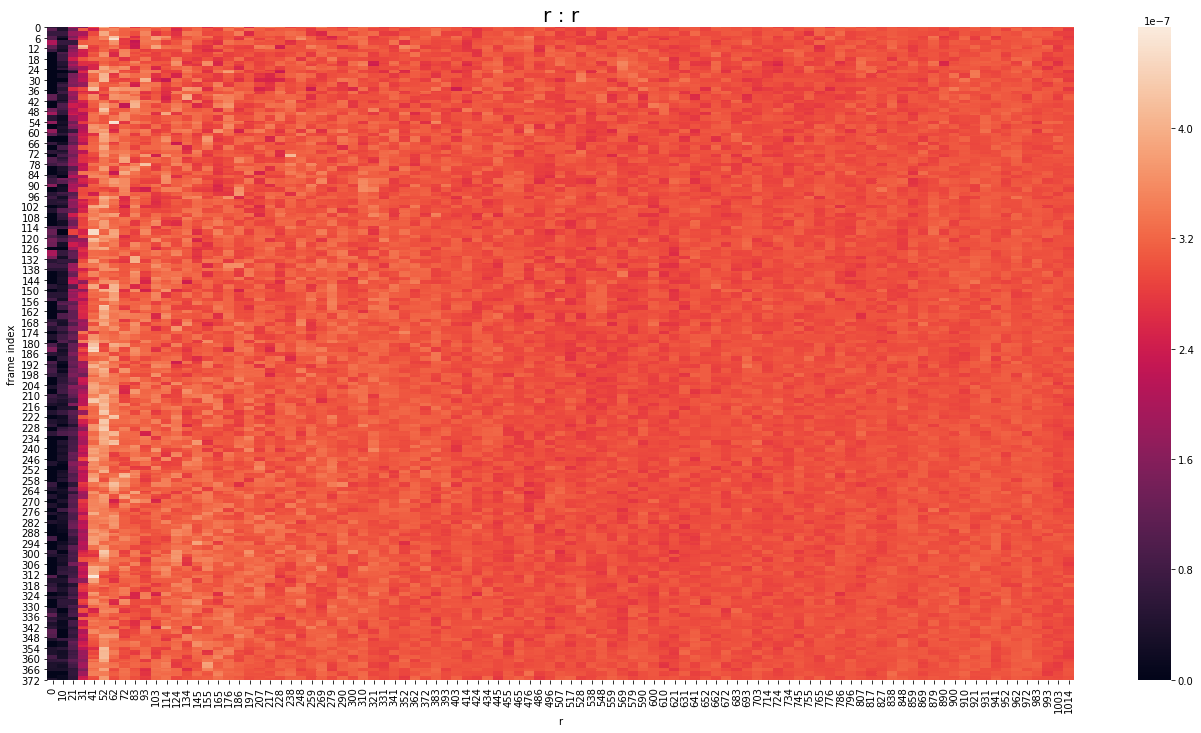

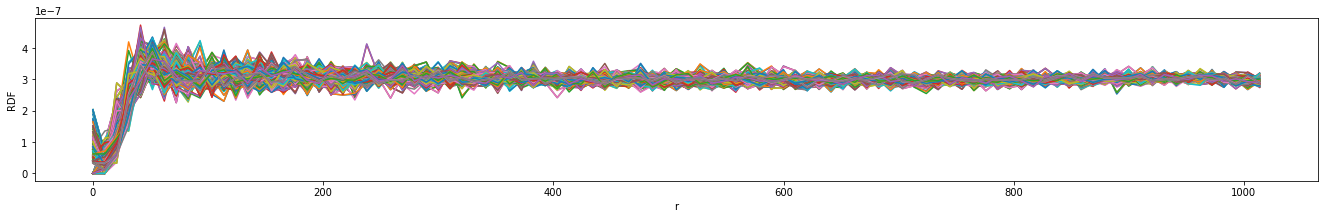

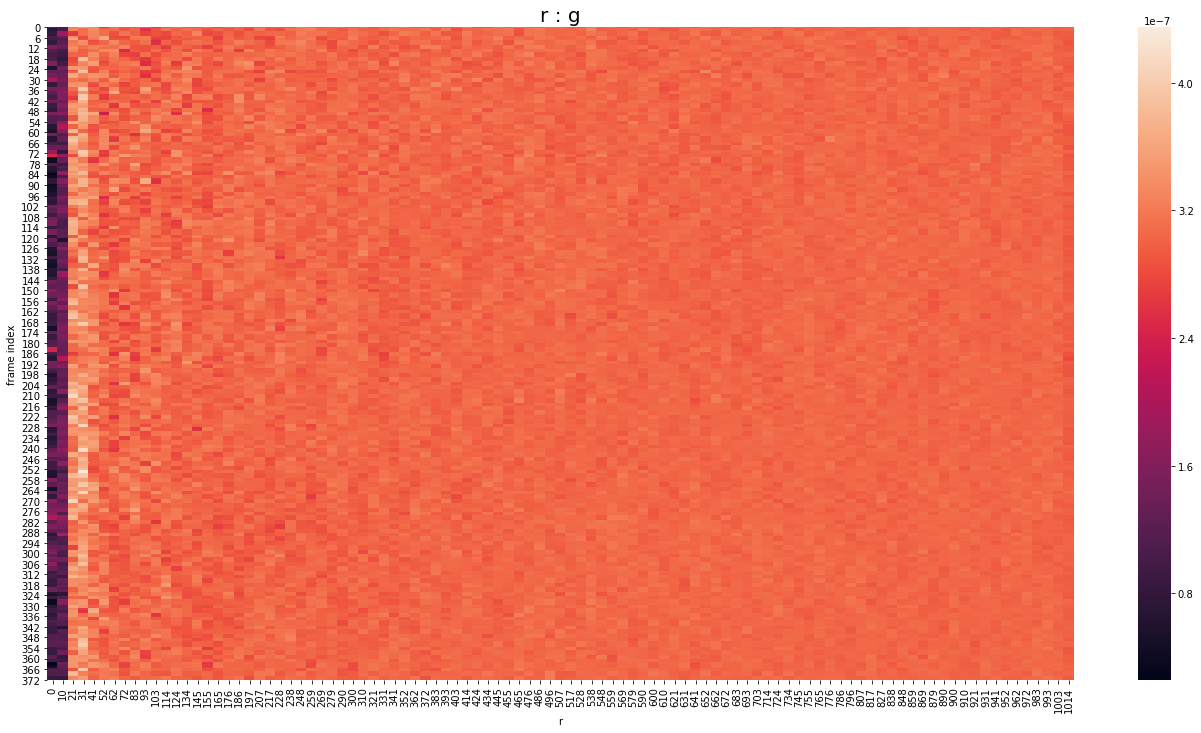

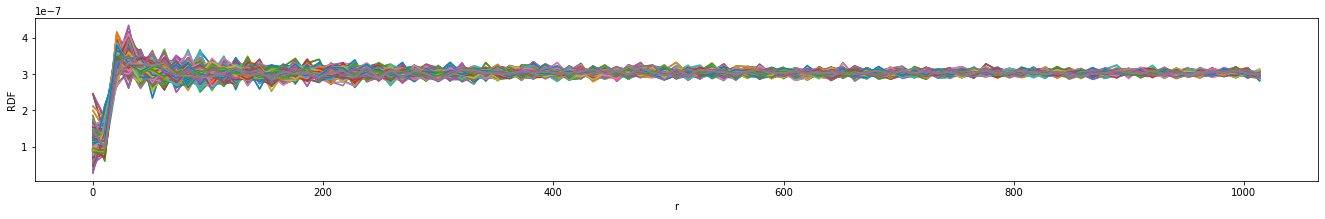

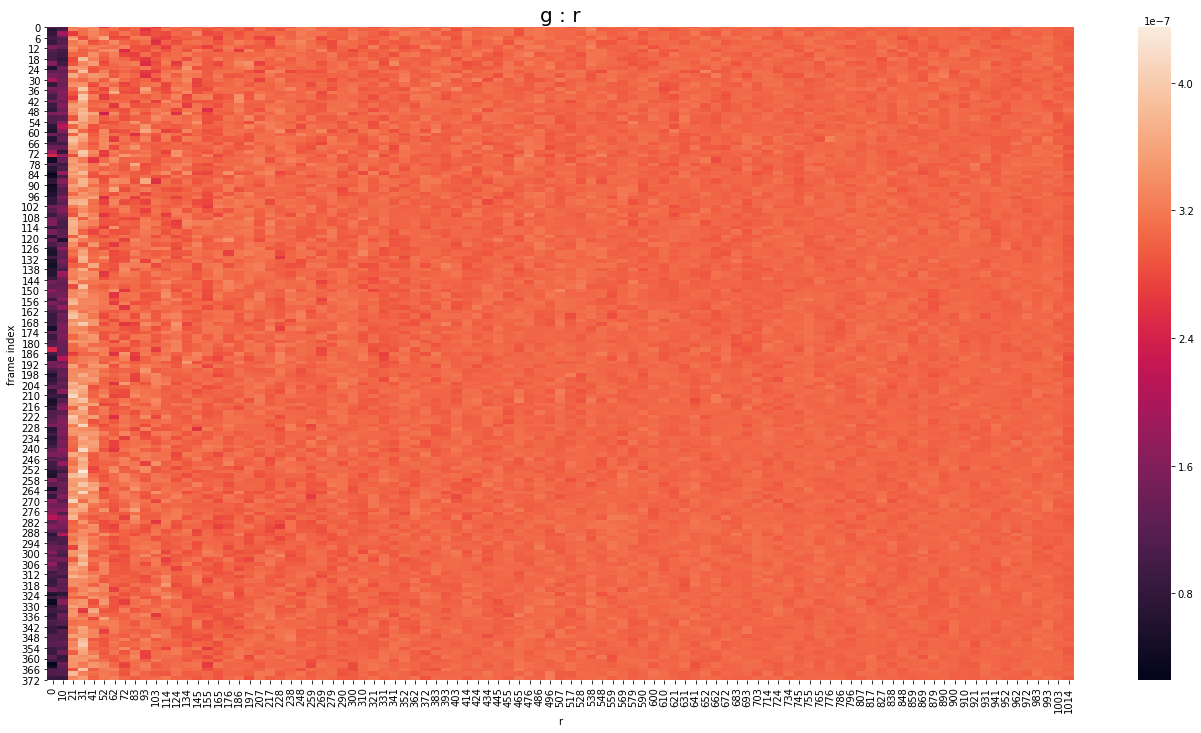

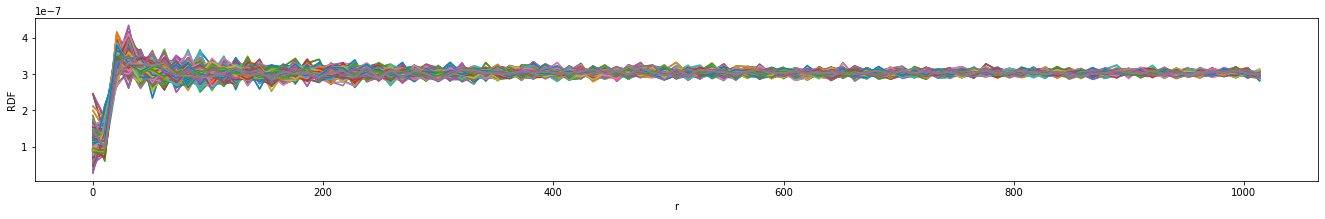

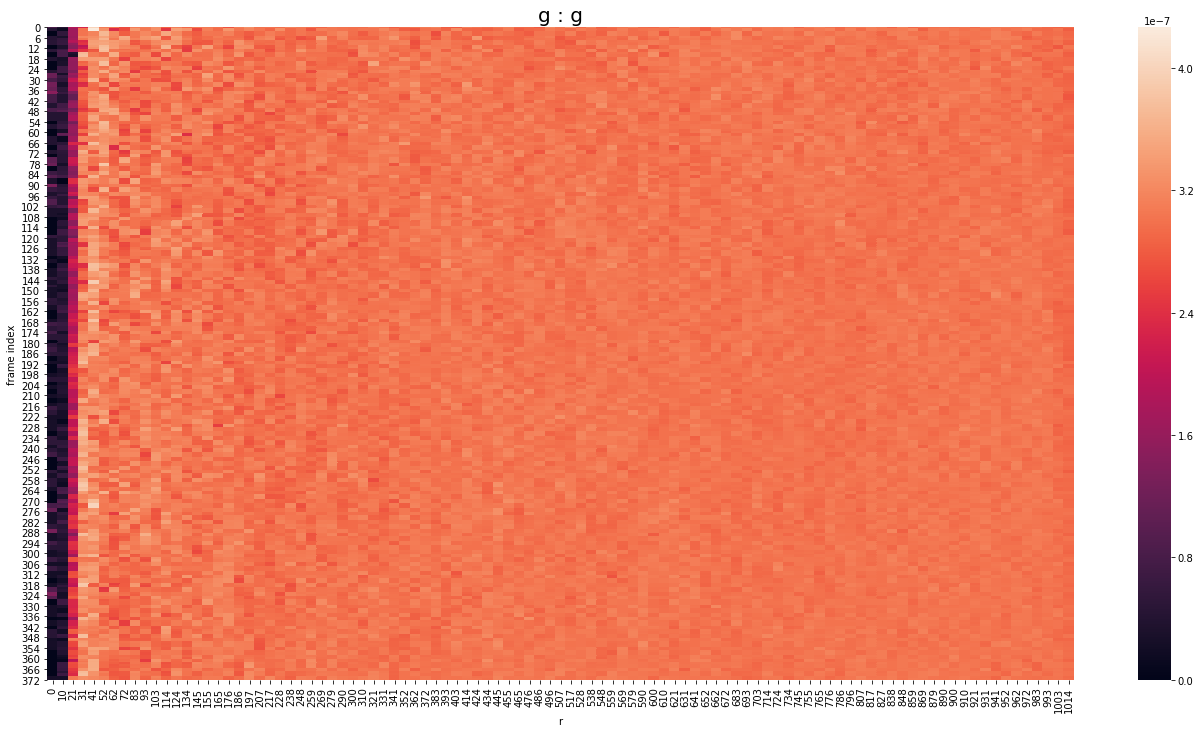

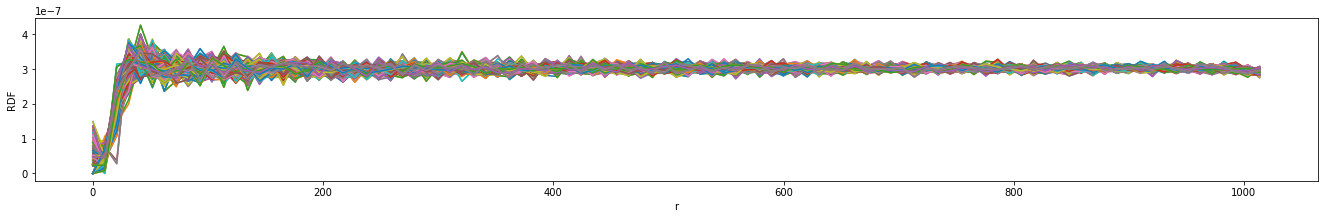

In [16]:
from flowermodel.plotting import plot_rdf_heatmap, plot_rdfs

for color1 in ['r', 'g']:
    for color2 in ['r', 'g']:
        rdf_file = '{:s}/blobs/{:s}.blob.rdf.color_{:s}{:s}.csv'.format(data_path, moviefile, color1, color2)
        plot_rdf_heatmap(rdf_file)
        plt.title('{:s} : {:s}'.format(color1, color2), size=20)
        # plt.figure()
        plot_rdfs(rdf_file)

# Scratch

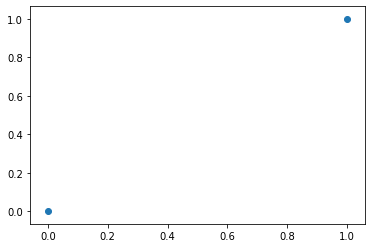

In [17]:
fig = plt.scatter([0, 1], [0, 1])

RuntimeError: Requested MovieWriter (ffmpeg) not available

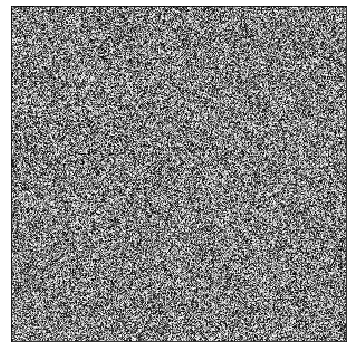

In [2]:
import matplotlib.animation as animation

dpi = 100

def ani_frame():
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    im = ax.imshow(np.random.rand(300,300),cmap='gray',interpolation='nearest')
    im.set_clim([0,1])
    fig.set_size_inches([5,5])


    plt.tight_layout()


    def update_img(n):
        tmp = np.random.rand(300,300)
        im.set_data(tmp)
        return im

    #legend(loc=0)
    ani = animation.FuncAnimation(fig,update_img,300,interval=30)
    writer = animation.writers['ffmpeg'](fps=30)

    ani.save('demo.mp4',writer=writer,dpi=dpi)
    return ani

ani_frame()